In [83]:
import numpy as np
import pandas as pd
%precision 3
pd.set_option('precision',3)


In [84]:
df = pd.read_csv('data/ch2_scores_em.csv',index_col='生徒番号')
df.head()

,英語,数学
生徒番号,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [85]:
scores = np.array(df['英語'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [86]:
scores_df = pd.DataFrame({'点数':scores},
                        index=pd.Index(['A','B','C','D','E','F','G','H','I','J'],name='生徒'))

scores_df

,点数
生徒,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [87]:
sum(scores)/len(scores)

55.0

In [88]:
np.mean(scores)

55.0

In [89]:
scores_df.mean()

点数    55.0
dtype: float64

In [90]:
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

In [91]:
n= len(sorted_scores)
if n % 2 == 0:
    m0 =sorted_scores[n//2-1]
    m1 = sorted_scores[n//2]
    median = (m0+m1)/2
else:
    median = sorted_score[(n+1)//2-1]
median

56.5

In [92]:
np.median(scores)

56.5

In [93]:
scores_df.median()

点数    56.5
dtype: float64

In [94]:
mean = np.mean(scores)
deviation = scores - mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [95]:
another_scores = [50,60,58,54,51,56,57,53,52,59]
another_mean = np.mean(another_scores)
another_devitation = another_scores - another_mean
another_devitation

array([-5.,  5.,  3., -1., -4.,  1.,  2., -2., -3.,  4.])

In [96]:
np.mean(deviation)
np.mean(another_devitation)

0.0

In [97]:
summary_df = scores_df.copy()
summary_df['偏差'] = deviation
summary_df

,点数,偏差
生徒,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


In [98]:
summary_df.mean()

点数    55.0
偏差     0.0
dtype: float64

In [99]:
np.mean(deviation ** 2)

86.0

In [100]:
np.var(scores)

86.0

In [101]:
scores_df.var()

点数    95.556
dtype: float64

In [102]:
summary_df['偏差二乗'] = np.square(deviation)
summary_df

,点数,偏差,偏差二乗
生徒,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [103]:
summary_df.mean()


点数      55.0
偏差       0.0
偏差二乗    86.0
dtype: float64

In [104]:
np.sqrt(np.var(scores,ddof=0))

9.273618495495704

In [105]:
np.std(scores,ddof=0)

9.273618495495704

In [106]:
np.max(scores) - np.min(scores)

28

In [107]:
scores_Q1 = np.percentile(scores,25)
scores_Q3 = np.percentile(scores,75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.0

In [108]:
pd.Series(scores).describe()

count    10.000
mean     55.000
std       9.775
min      41.000
25%      48.250
50%      56.500
75%      63.250
max      69.000
dtype: float64

In [109]:
scores_df.describe()

,点数
count,10.000
mean,55.000
std,9.775
min,41.000
25%,48.250
50%,56.500
75%,63.250
max,69.000


In [110]:
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.402,  1.51 ,  0.108, -1.51 ,  0.216, -0.755,  1.078, -0.647,
        1.078,  0.323])

In [111]:
np.mean(z),np.std(z,ddof=0)

(-1.6653345369377347e-17, 0.9999999999999999)

In [112]:
z = 50 + 10 * (scores - np.mean(scores))/ np.std(scores)
z

array([35.982, 65.097, 51.078, 34.903, 52.157, 42.452, 60.783, 43.53 ,
       60.783, 53.235])

In [113]:
scores_df['偏差値']=z
scores_df

,点数,偏差値
生徒,,
A,42,35.982
B,69,65.097
C,56,51.078
D,41,34.903
E,57,52.157
F,48,42.452
G,65,60.783
H,49,43.530
I,65,60.783


In [114]:
english_scores = np.array(df['英語'])
pd.Series(english_scores).describe()

count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
dtype: float64

In [115]:
freq,_=np.histogram(english_scores,bins=10,range=(0,100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [116]:
freq_class = [f'{i}~{i+10}' for i in range(0,100,10)]
freq_dist_df = pd.DataFrame({'度数':freq},
                           index=pd.Index(freq_class, name='階級'))

freq_dist_df

,度数
階級,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [117]:
class_value = [(i+(i+10))//2 for i in range(0
                                             ,100,10)]
class_values

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [118]:
rel_freq = freq/freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [119]:
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [120]:
freq_dist_df['階級値']=class_value
freq_dist_df['相対度数']=rel_freq
freq_dist_df['累計相対度数']=cum_rel_freq
freq_dist_df=freq_dist_df[['階級値','度数','相対度数','累計相対度数']]
freq_dist_df

,階級値,度数,相対度数,累計相対度数
階級,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


In [121]:
import matplotlib.pyplot as plt
%matplotlib inline


C:\Users\81907\anaconda3\envs\myspace\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\81907\anaconda3\envs\myspace\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\81907\anaconda3\envs\myspace\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 28857 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\81907\anaconda3\envs\myspace\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\81907\anaconda3\envs\myspace\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20154 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\81907\anaconda3\envs\myspace\lib\site-packages\matplotl

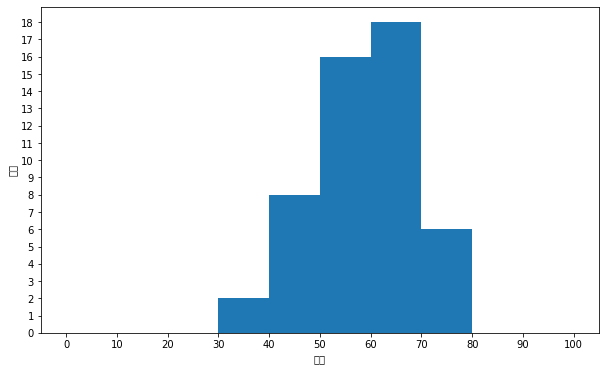

In [123]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

freq,_,_=ax.hist(english_scores,bins=10,range=(0,100))
ax.set_xlabel('点数')
ax.set_ylabel('人数')
ax.set_xticks(np.linspace(0,100,10+1))
ax.set_yticks(np.arange(0,freq.max()+1))
plt.show()

C:\Users\81907\anaconda3\envs\myspace\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\81907\anaconda3\envs\myspace\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\81907\anaconda3\envs\myspace\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 28857 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\81907\anaconda3\envs\myspace\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\81907\anaconda3\envs\myspace\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20154 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\81907\anaconda3\envs\myspace\lib\site-packages\matplotl

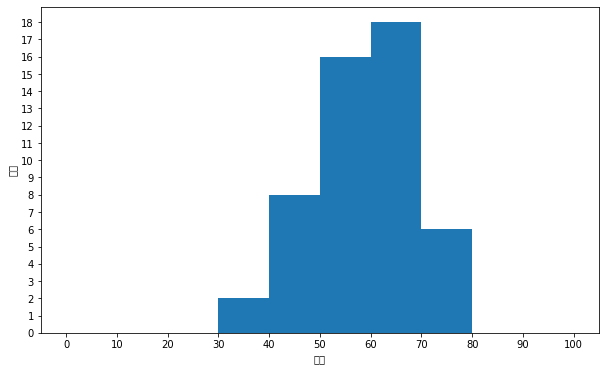

In [123]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

freq,_,_=ax.hist(english_scores,bins=10,range=(0,100))
ax.set_xlabel('点数')
ax.set_ylabel('人数')
ax.set_xticks(np.linspace(0,100,10+1))
ax.set_yticks(np.arange(0,freq.max()+1))
plt.show()

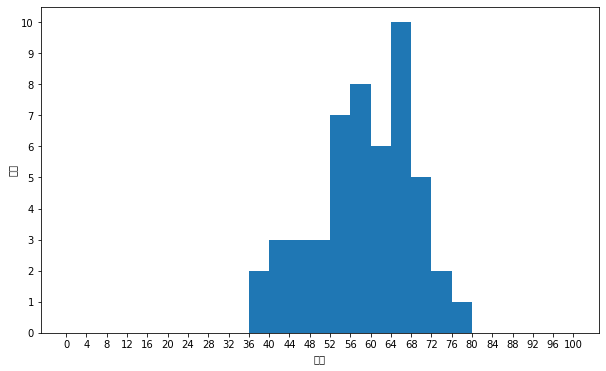

In [124]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

freq,_,_=ax.hist(english_scores,bins=25,range=(0,100))
ax.set_xlabel('点数')
ax.set_ylabel('人数')
ax.set_xticks(np.linspace(0,100,25+1))
ax.set_yticks(np.arange(0,freq.max()+1))
plt.show()

C:\Users\81907\anaconda3\envs\myspace\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\81907\anaconda3\envs\myspace\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\81907\anaconda3\envs\myspace\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 28857 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\81907\anaconda3\envs\myspace\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\81907\anaconda3\envs\myspace\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\81907\anaconda3\envs\myspace\lib\site-packages\matplotl

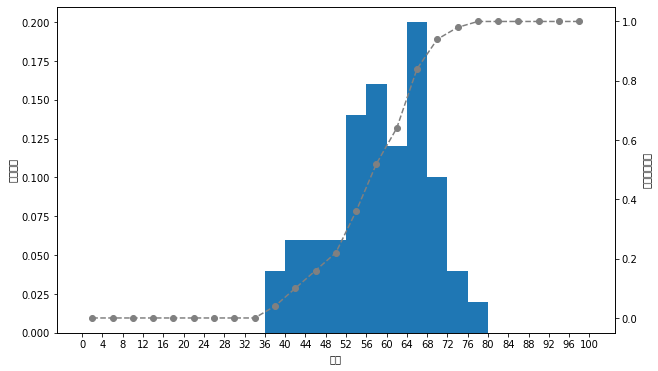

In [128]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
weights = np.ones_like(english_scores) / len(english_scores)
rel_freq,_,_=ax1.hist(english_scores,bins=25,range=(0,100),weights=weights)
cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0,100,4)]

ax2.plot(class_value,cum_rel_freq,ls='--',marker='o',color='gray')
ax2.grid(visible=False)
ax1.set_xlabel('点数')
ax1.set_ylabel('相対度数')
ax2.set_ylabel('累計相対度数')
ax1.set_xticks(np.linspace(0,100,25+1))

plt.show()

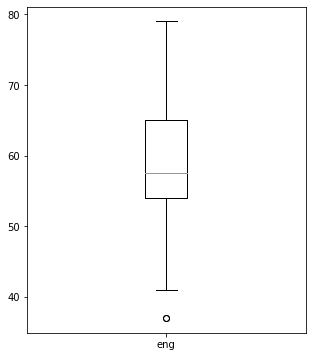

In [132]:
fig = plt.figure(figsize=(5,6))
ax= fig.add_subplot(111)
ax.boxplot(english_scores,labels=['eng'])
plt.show()